# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [2]:
import pandas as pd
df = pd.read_csv('mpg.csv')
missing_data = df[df.isnull().any(axis=1)]
print("Các dòng có dữ liệu thiếu:")
print(missing_data)


Các dòng có dữ liệu thiếu:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin                  name  
32           71     usa            ford pinto  
126          74     usa         ford maverick  
330          80  europe  renault lecar deluxe  
336          80     usa    ford mustang cobra  
354          81  europe           renault 18i  
374          82     usa        amc concord dl  


### 2.2 Xóa các dòng không có dữ liệu


In [18]:
import pandas as pd

df_cleaned = df.dropna(inplace = True)
print("DataFrame sau khi xóa dòng có dữ liệu NaN:")
print(df)


DataFrame sau khi xóa dòng có dữ liệu NaN:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chev

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [4]:
import pandas as pd


mean_cylinders = df['cylinders'].mean()
median_cylinders = df['cylinders'].median()

mean_horsepower = df['horsepower'].mean()
median_horsepower = df['horsepower'].median()

mean_weight = df['weight'].mean()
median_weight = df['weight'].median()

print(f"Trung bình số cylinders: {mean_cylinders}")
print(f"Trung vị số cylinders: {median_cylinders}")
print()
print(f"Trung bình công suất động cơ: {mean_horsepower}")
print(f"Trung vị công suất động cơ: {median_horsepower}")
print()
print(f"Trung bình trọng lượng xe: {mean_weight}")
print(f"Trung vị trọng lượng xe: {median_weight}")


Trung bình số cylinders: 5.454773869346734
Trung vị số cylinders: 4.0

Trung bình công suất động cơ: 104.46938775510205
Trung vị công suất động cơ: 93.5

Trung bình trọng lượng xe: 2970.424623115578
Trung vị trọng lượng xe: 2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [20]:
mpg_range = df['mpg'].max() - df['mpg'].min()
print(f"Miền giá trị của mpg là: {mpg_range}")

mpg_stats = df['mpg'].describe()
print(f"Miền phân vị: Q1: {mpg_stats['25%']}")
print(f"Miền phân vị: Q2: {mpg_stats['50%']}")
print(f"Miền phân vị: Q3: {mpg_stats['75%']}")


Miền giá trị của mpg là: 37.6
Miền phân vị: Q1: 17.0
Miền phân vị: Q2: 22.75
Miền phân vị: Q3: 29.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [21]:
import pandas as pd

average_mpg_by_origin = df.groupby('origin')['mpg'].mean()

print("Mức tiêu hao nhiên liệu trung bình theo xuất xứ:")
print(average_mpg_by_origin)


Mức tiêu hao nhiên liệu trung bình theo xuất xứ:
origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

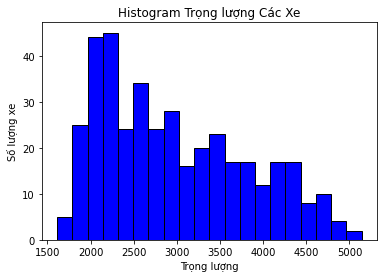

In [23]:
import matplotlib.pyplot as plt

plt.hist(df['weight'], bins=20, color='blue', edgecolor='black')

plt.xlabel('Trọng lượng')
plt.ylabel('Số lượng xe')
plt.title('Histogram Trọng lượng Các Xe')

plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

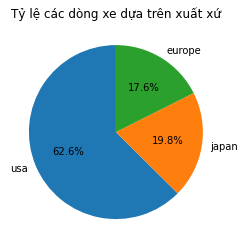

In [24]:
df = pd.read_csv('mpg.csv')

origin_counts = df['origin'].value_counts()
plt.pie(origin_counts, labels=origin_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ các dòng xe dựa trên xuất xứ')

plt.show()


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

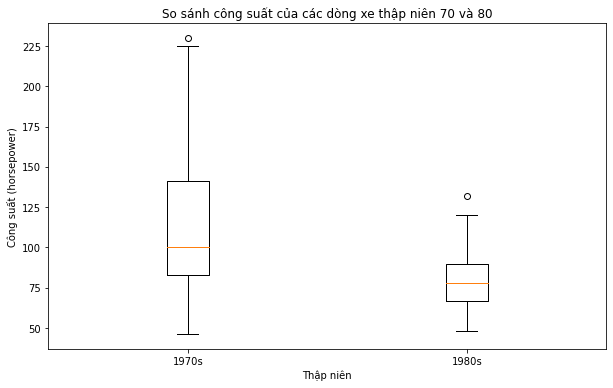

In [39]:
# Lấy dữ liệu cho thập niên 70 và 80
df_70s = df[df['model_year'].between(70, 79)]
df_80s = df[df['model_year'].between(80, 89)]

# Lọc và xóa các giá trị NaN trong công suất
horsepower_70s = df_70s['horsepower'].dropna().values
horsepower_80s = df_80s['horsepower'].dropna().values

# Vẽ boxplot so sánh công suất
plt.figure(figsize=(10, 6))
plt.boxplot([horsepower_70s, horsepower_80s], labels=['1970s', '1980s'])
plt.title('So sánh công suất của các dòng xe thập niên 70 và 80')
plt.xlabel('Thập niên')
plt.ylabel('Công suất (horsepower)')
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

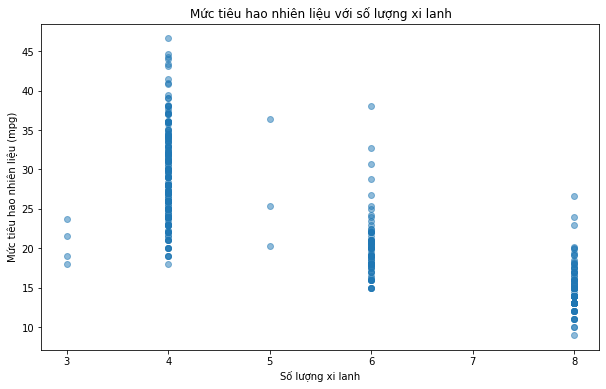

In [32]:
# Vẽ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cylinders'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu với số lượng xi lanh')
plt.xlabel('Số lượng xi lanh')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.show()


### 7.2 Với công suất theo mã lực

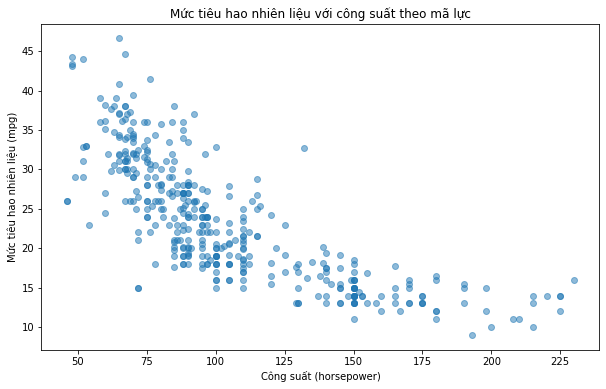

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['horsepower'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu với công suất theo mã lực')
plt.xlabel('Công suất (horsepower)')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.show()

### 7.3 Với gia tốc

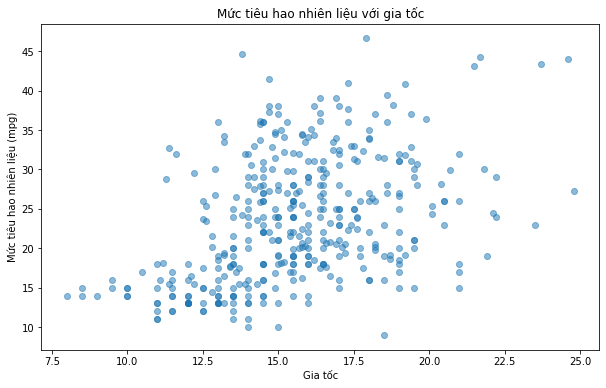

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['acceleration'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu với gia tốc')
plt.xlabel('Gia tốc')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.show()

### 7.4 Với năm sản xuất

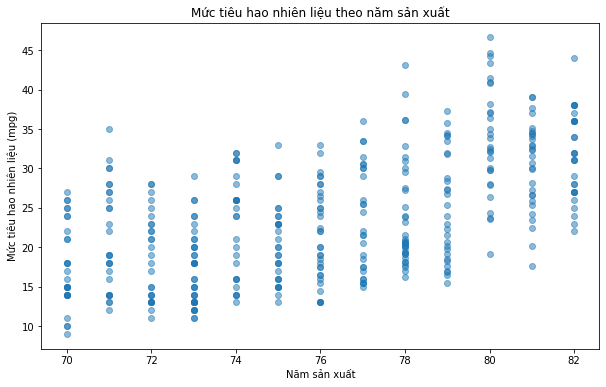

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['model_year'], df['mpg'], alpha=0.5)
plt.title('Mức tiêu hao nhiên liệu theo năm sản xuất')
plt.xlabel('Năm sản xuất')
plt.ylabel('Mức tiêu hao nhiên liệu (mpg)')
plt.show()